# **Regularización**

## Inicialización en común

Cargar las librerías, cargar los datos, escalar los datos y **valores de alfa**.

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

np.set_printoptions(linewidth=120)
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [184]:
# generar un conjunto de datos de ejemplo
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [185]:
# escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
# 50 valores logaritmicos entre 0.001 y 10
alphas = np.logspace(-3, 1, 50)
print("alphas: \n", alphas)

alphas: 
 [ 0.001   0.0012  0.0015  0.0018  0.0021  0.0026  0.0031  0.0037  0.0045  0.0054  0.0066  0.0079  0.0095  0.0115
  0.0139  0.0168  0.0202  0.0244  0.0295  0.0356  0.0429  0.0518  0.0625  0.0754  0.091   0.1099  0.1326  0.16
  0.1931  0.233   0.2812  0.3393  0.4095  0.4942  0.5964  0.7197  0.8685  1.0481  1.2649  1.5264  1.8421  2.223
  2.6827  3.2375  3.9069  4.7149  5.6899  6.8665  8.2864 10.    ]


## 1. Regularización Lasso (L1)

In [187]:
coef_lasso = []
train_errors_lasso = []
test_errors_lasso = []

# probar diferentes valores de alpha
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)

  X_train_pred = lasso.predict(X_train)   # predicciones en train
  X_test_pred = lasso.predict(X_test)     # predicciones en test

  mse_train = mean_squared_error(y_train, X_train_pred) # MSE en train
  mse_test = mean_squared_error(y_test, X_test_pred)    # MSE en test

  # guardar coeficientes y la métrica de error
  coef_lasso.append(lasso.coef_)
  train_errors_lasso.append(mse_train)
  test_errors_lasso.append(mse_test)

In [188]:
train_errors_lasso[:5]
# train_errors_lasso

[0.008416348109328781,
 0.008418662505653922,
 0.008422040045264803,
 0.008426967333745775,
 0.008434153336551365]

In [189]:
test_errors_lasso[:5]
# test_errors_lasso

[0.009747022474654468,
 0.009760405160322881,
 0.009777095063442005,
 0.009798022418445764,
 0.009824422235989932]

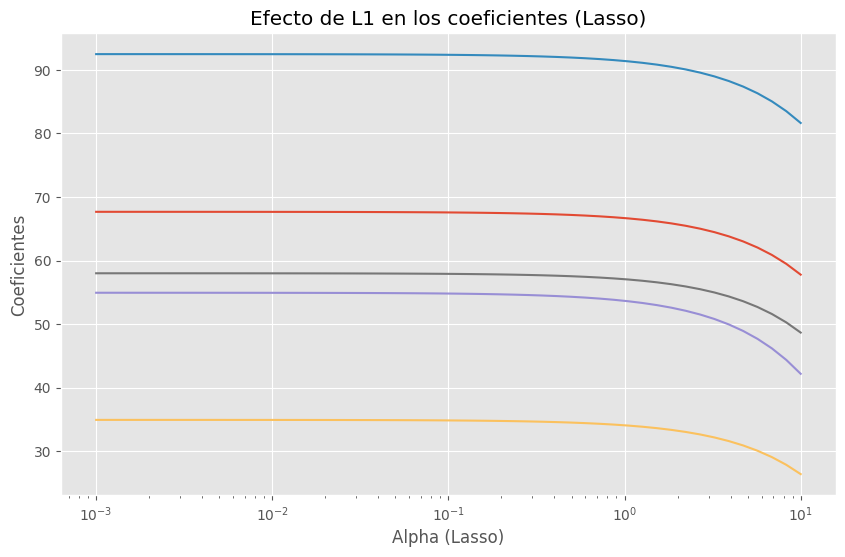

In [190]:
# graficar coeficientes
plt.figure(figsize=(10, 6))
plt.plot(alphas, coef_lasso)
plt.xscale('log')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Coeficientes')
plt.title('Efecto de L1 en los coeficientes (Lasso)')
plt.grid(True)
plt.show()

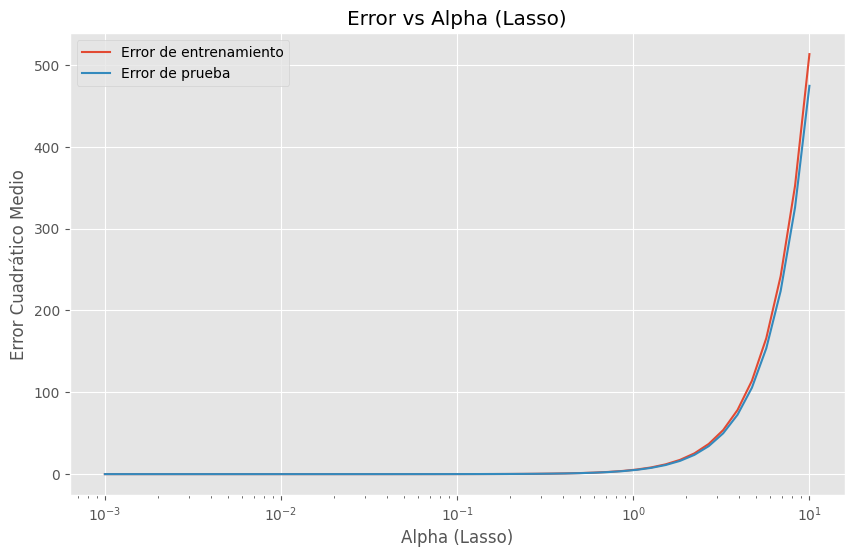

In [191]:
# graficar errores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_lasso, label='Error de entrenamiento')
plt.plot(alphas, test_errors_lasso, label='Error de prueba')
plt.xscale('log')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error vs Alpha (Lasso)')
plt.legend()
plt.grid(True)
plt.show()

## 2. Regularización Ridge

In [192]:
# 50 valores logaritmicos entre 0.001 y 10
alphas = np.logspace(-3, 1, 50)

coef_ridge = []
train_errors_ridge = []
test_errors_ridge = []

# probar diferentes valores de alpha
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)

  X_train_pred = ridge.predict(X_train)   # predicciones en train
  X_test_pred = ridge.predict(X_test)     # predicciones en test

  mse_train = mean_squared_error(y_train, X_train_pred) # MSE en train
  mse_test = mean_squared_error(y_test, X_test_pred)    # MSE en test

  # guardar coeficientes y la métrica de error
  coef_ridge.append(ridge.coef_)
  train_errors_ridge.append(mse_train)
  test_errors_ridge.append(mse_test)

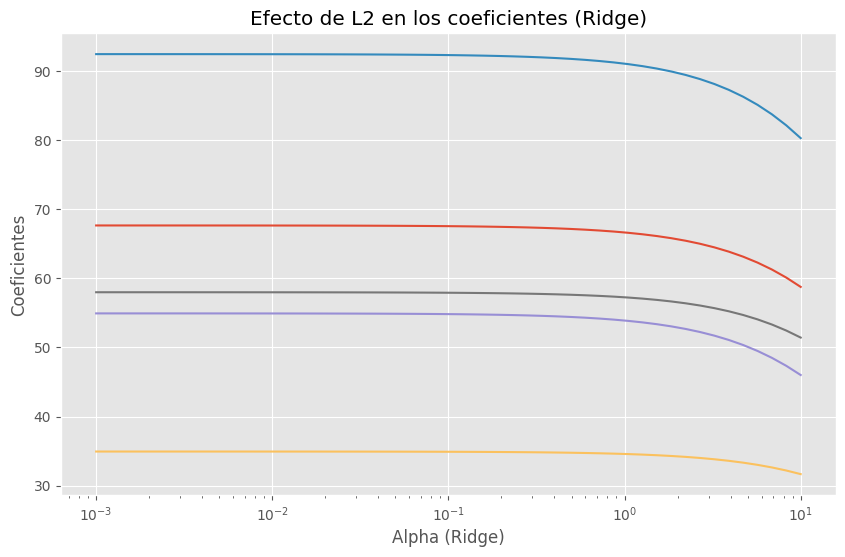

In [193]:
# graficar coeficientes
plt.figure(figsize=(10, 6))
plt.plot(alphas, coef_ridge)
plt.xscale('log')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Coeficientes')
plt.title('Efecto de L2 en los coeficientes (Ridge)')
plt.grid(True)
plt.show()

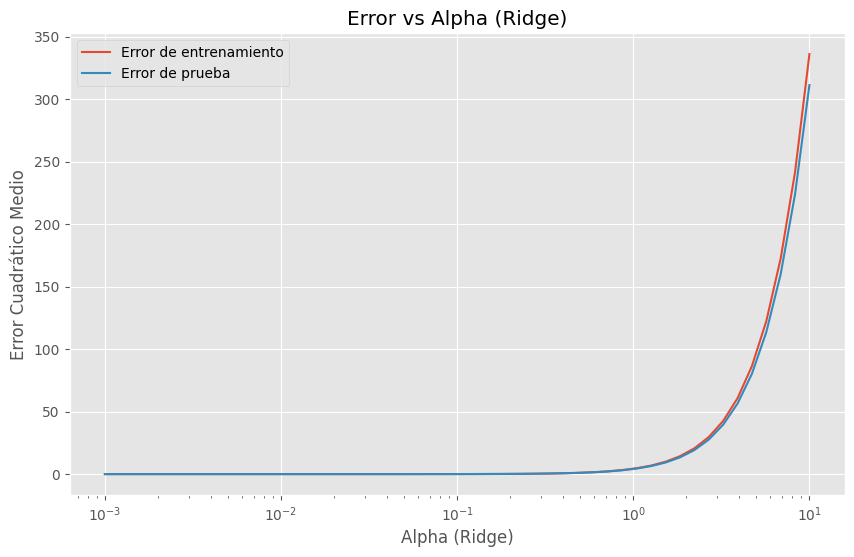

In [194]:
# graficar errores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_ridge, label='Error de entrenamiento')
plt.plot(alphas, test_errors_ridge, label='Error de prueba')
plt.xscale('log')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error vs Alpha (Ridge)')
plt.legend()
plt.grid(True)
plt.show()

## 3. Regularización ElasticNet

In [195]:
coef_elastic = []
train_errors_elastic = []
test_errors_elastic = []

l1_ratio = 0.5                    # controla la proporción entre L1 y L2 (0 = solo L2, 1 = solo L1)
alphas = np.logspace(-3, 1, 50)   # valores de alpha a probar

# probar diferentes valores de alpha
for alpha in alphas:
  elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
  elastic_net.fit(X_train, y_train)

  coef_elastic.append(elastic_net.coef_)

  X_train_pred = elastic_net.predict(X_train)   # predicciones en train
  X_test_pred = elastic_net.predict(X_test)     # predicciones en test

  mse_train = mean_squared_error(y_train, X_train_pred) # MSE en train
  mse_test = mean_squared_error(y_test, X_test_pred)    # MSE en test

  # guardar coeficientes y la métrica de error
  train_errors_elastic.append(mse_train)
  test_errors_elastic.append(mse_test)

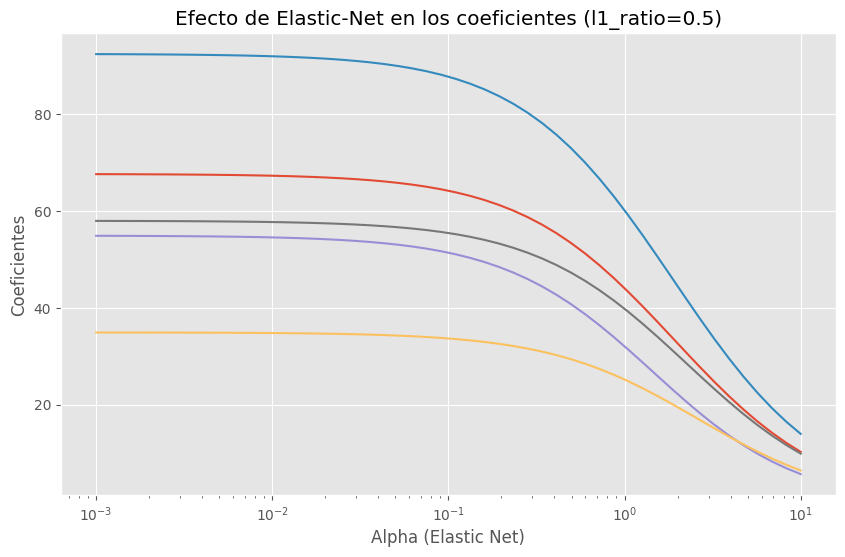

In [196]:
# graficar coeficientes de Elastic Net
plt.figure(figsize=(10, 6))
plt.plot(alphas, coef_elastic)
plt.xscale('log')
plt.xlabel('Alpha (Elastic Net)')
plt.ylabel('Coeficientes')
plt.title(f'Efecto de Elastic-Net en los coeficientes (l1_ratio={ l1_ratio })')
plt.grid(True)
plt.show()

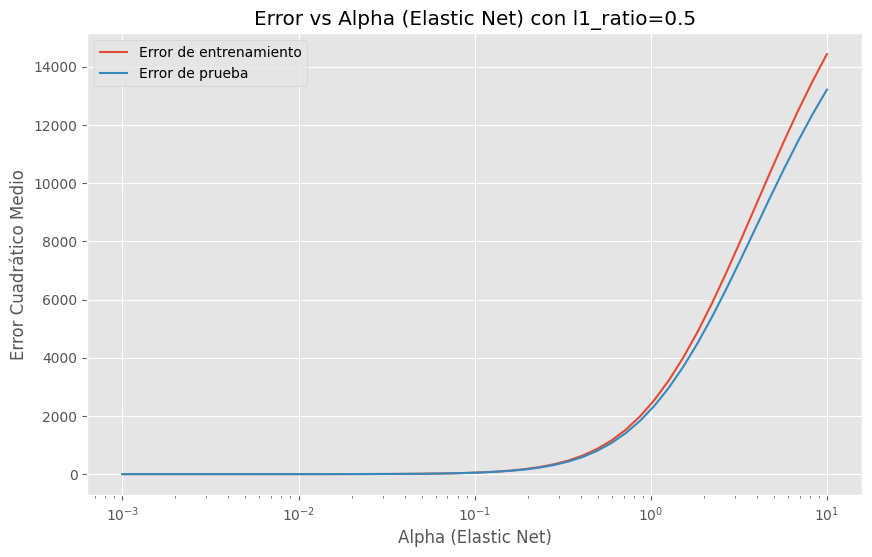

In [197]:
# graficar errores para Elastic Net
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_elastic, label='Error de entrenamiento')
plt.plot(alphas, test_errors_elastic, label='Error de prueba')
plt.xscale('log')
plt.xlabel('Alpha (Elastic Net)')
plt.ylabel('Error Cuadrático Medio')
plt.title(f'Error vs Alpha (Elastic Net) con l1_ratio={ l1_ratio }')
plt.legend()
plt.grid(True)
plt.show()

# Caso de estudio: 'boston-houses-dataset'

## Carga del datset + inspección inicial

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [199]:
response = requests.get('https://lib.stat.cmu.edu/datasets/boston') # URL del dataset
data = response.text                                                # descargar el dataset

# extraer las dos tablas del archivo de texto
data = data.split('\n')
header = data[0:2]
raw_data = data[22:]  # saltar las primeras líneas que son metadatos

# juntar todos los datos en una sola lista de strings
raw_data = ' '.join(raw_data).split()

# convertir los datos en un numpy array
data_array = np.array(raw_data, dtype=float).reshape((-1, 14))

# crear un DataFrame con los datos
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data_array, columns=column_names)

boston_dataset = df
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


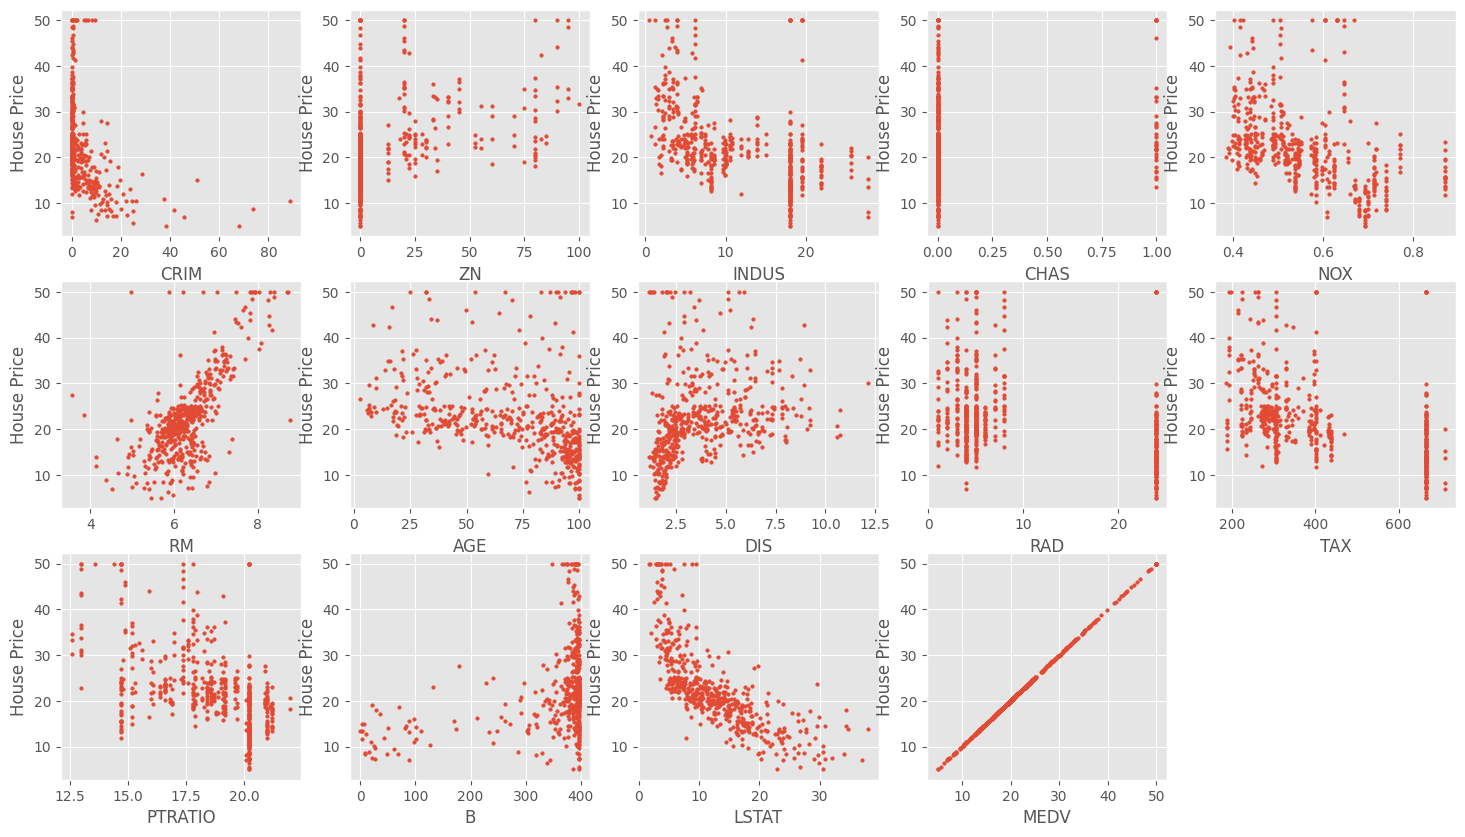

In [200]:
# inspección del dataset
plt.style.use('ggplot')   # generate scatter plot of independent vs Dependent variable
fig = plt.figure(figsize = (18, 10))

for index, feature_name in enumerate(column_names):
    ax = fig.add_subplot(3, 5, index + 1)
    ax.scatter(boston_dataset.iloc[:, index], boston_dataset["MEDV"], s=6)
    ax.set_ylabel('House Price', size = 12)
    ax.set_xlabel(feature_name, size = 12)

plt.show()

## Pre-procesamiento

In [201]:
boston_dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [202]:
boston_dataset.rename(columns={'MEDV':'House Price'}, inplace=True)

In [203]:
X = boston_dataset.iloc[:, :-1]   # input (todas las columnas menos la última)
Y = boston_dataset.iloc[:, -1]    # output (última columna)

In [204]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [205]:
Y.head(3)

,House Price
0,24.0
1,21.6
2,34.7


In [206]:
# train/test sets
x_train, x_test, y_train, y_test = train_test_split(boston_dataset.iloc[:, :-1], boston_dataset.iloc[:, -1], test_size = 0.25)

print(f"Train data shape of X = { x_train.shape } and Y = { y_train.shape }")
print(f"Test data shape of X = { x_test.shape } and Y = { y_test.shape }")

Train data shape of X = (379, 13) and Y = (379,)
Test data shape of X = (127, 13) and Y = (127,)


In [208]:
# regresión lineal múltiple
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# generate prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error (TEST): ", mean_squared_error, "\n")

# putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error (TEST):  19.973685009717826 

    Columns  Coefficient Estimate
0      CRIM             -0.078215
1        ZN              0.038869
2     INDUS              0.034092
3      CHAS              2.723320
4       NOX            -16.406867
5        RM              3.762061
6       AGE              0.005235
7       DIS             -1.318136
8       RAD              0.288883
9       TAX             -0.012256
10  PTRATIO             -0.838615
11        B              0.010236
12    LSTAT             -0.547039


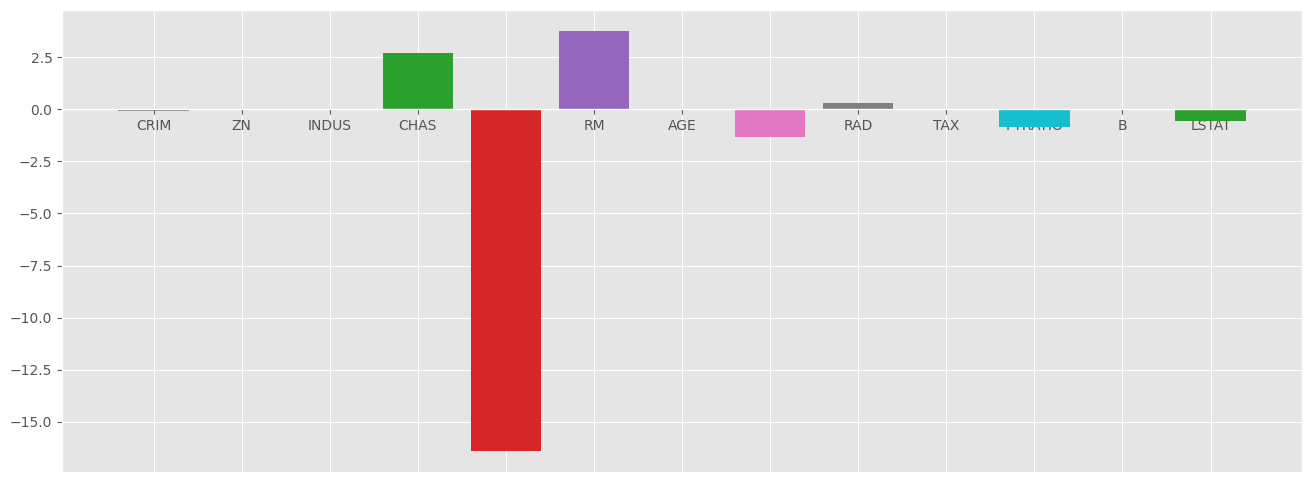

In [209]:
color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
  'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# gráfica de los valores de los coeficientes
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(lreg_coefficient["Columns"], lreg_coefficient['Coefficient Estimate'], color = color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

Como podemos observar, muchas de las variables tienen coeficientes insignificantes, estos coeficientes no contribuyeron mucho al modelo y es necesario regular o incluso eliminar algunas de estas variables.


## Regresión de Ridge


Quizás la forma más común de regularización se conoce como *regresión Ridge* o *regresión cresta* o *regularización* $L_2$ (a veces también llamada *regularización de Tikhonov*).

Esta se lleva a cabo penalizando la suma de cuadrados (2-normas) de los coeficientes del modelo $\theta_n$. En este caso, la penalización en el ajuste del modelo sería:
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$

donde $\alpha$ es un parámetro libre que controla la fuerza de la penalización.
Este tipo de modelo penalizado está integrado en Scikit-Learn con el estimador `Ridge`.

La regresión de Ridge agregó un término en la función de error de mínimos cuadrados ordinarios que regulariza el valor de los coeficientes de las variables. Este término es la suma de los cuadrados del coeficiente multiplicado por el parámetro. El motivo de agregar este término es penalizar la variable correspondiente a ese coeficiente que no está muy correlacionada con la variable objetivo.

In [218]:
# train the model
ridgeR = Ridge(alpha = 10)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean squared Error (TEST): ", mean_squared_error, "\n")

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean squared Error (TEST):  19.973685009717826 

    Columns  Coefficient Estimate
0      CRIM             -0.069521
1        ZN              0.042189
2     INDUS             -0.022289
3      CHAS              1.935124
4       NOX             -1.757842
5        RM              3.530618
6       AGE             -0.004259
7       DIS             -1.104135
8       RAD              0.268729
9       TAX             -0.014484
10  PTRATIO             -0.675350
11        B              0.010820
12    LSTAT             -0.591545


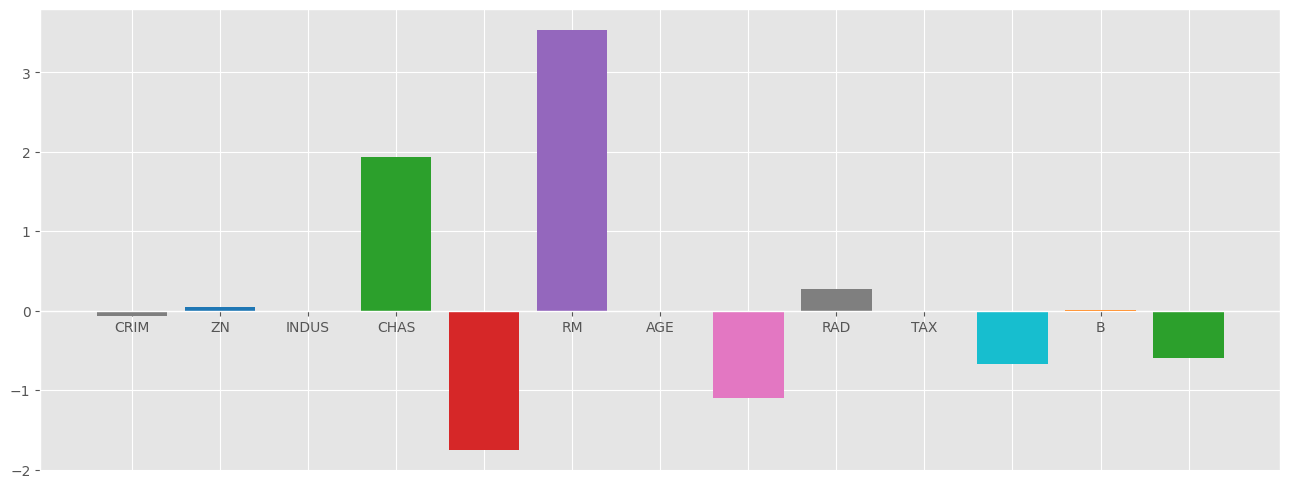

In [219]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(ridge_coefficient["Columns"], ridge_coefficient['Coefficient Estimate'], color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

### ¿Cuál sería el resultado con un valor de alpha en 10?

- El MSE se mantuvo igual: 19.9736

- A medida que aumenta el **alfa**, se reduce la disparidad en los coeficientes:

| Column    |          Coef. Base |  Coef. Ridge Alfa=1 | Coef. Ridge Alfa=10 |
|-----------|---------------------|---------------------|---------------------|
| CRIM      |           -0.078215 |           -0.072468 |           -0.069521 |
| ZN        |            0.038869 |            0.040026 |            0.042189 |
| INDUS     |            0.034092 |            0.003878 |           -0.022289 |
| CHAS      |            2.723320 |            2.612258 |            1.935124 |
| NOX       |          -16.406867 |           -8.951467 |           -1.757842 |
| RM        |            3.762061 |            3.778146 |            3.530618 |
| AGE       |            0.005235 |           -0.000832 |           -0.004259 |
| DIS       |           -1.318136 |           -1.209418 |           -1.104135 |
| RAD       |            0.288883 |            0.273194 |            0.268729 |
| TAX       |           -0.012256 |           -0.013077 |           -0.014484 |
| PTRATIO   |           -0.838615 |           -0.745072 |           -0.675350 |
| B         |            0.010236 |            0.010625 |            0.010820 |
| LSTAT     |           -0.547039 |           -0.560695 |           -0.591545 |


## Lasso

Otro tipo común de regularización se conoce como *regresión lasso* o *regularización L1* e implica penalizar la suma de los valores absolutos (1-normas) de los coeficientes de regresión:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$

Aunque esto es conceptualmente muy similar a la regresión ridge, los resultados pueden diferir sorprendentemente.

Por ejemplo, debido a su construcción, la regresión lasso tiende a favorecer los *modelos dispersos* cuando es posible: es decir, establece preferentemente muchos coeficientes del modelo exactamente a cero.



In [222]:
# train the model
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# calculate mean squared error (MSE)
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error (TEST):", mean_squared_error, "\n")

lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)

Mean squared error (TEST): 28.1365174528696 

    Columns  Coefficient Estimate
0      CRIM             -0.040555
1        ZN              0.037494
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.877508
6       AGE              0.026432
7       DIS             -0.562780
8       RAD              0.243945
9       TAX             -0.015493
10  PTRATIO             -0.594374
11        B              0.008653
12    LSTAT             -0.764931


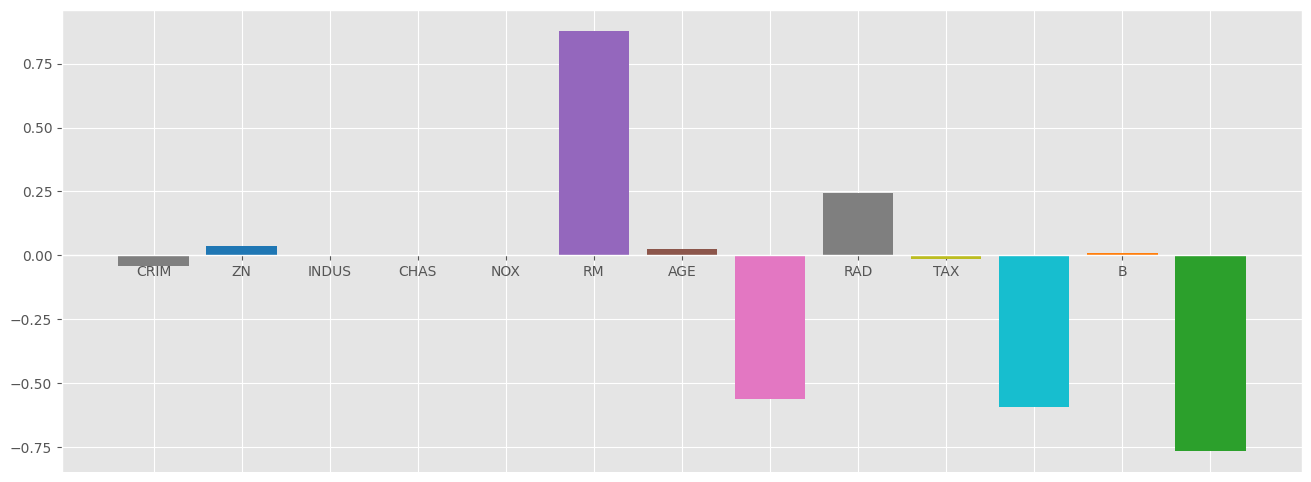

In [224]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(lasso_coeff["Columns"], lasso_coeff['Coefficient Estimate'], color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

## Elastic-Net

In [229]:
# train the model
e_net = ElasticNet(alpha = 0.5)
e_net.fit(x_train, y_train)

y_pred_elastic = e_net.predict(x_test)

# calculate the prediction and mean square error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error (TEST):", mean_squared_error, "\n")

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error (TEST): 24.578602009223626 



,Columns,Coefficient Estimate
0,CRIM,-0.069377
1,ZN,0.044852
2,INDUS,-0.000300
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.685643
6,AGE,0.014008
7,DIS,-0.864252
8,RAD,0.300321
9,TAX,-0.017332


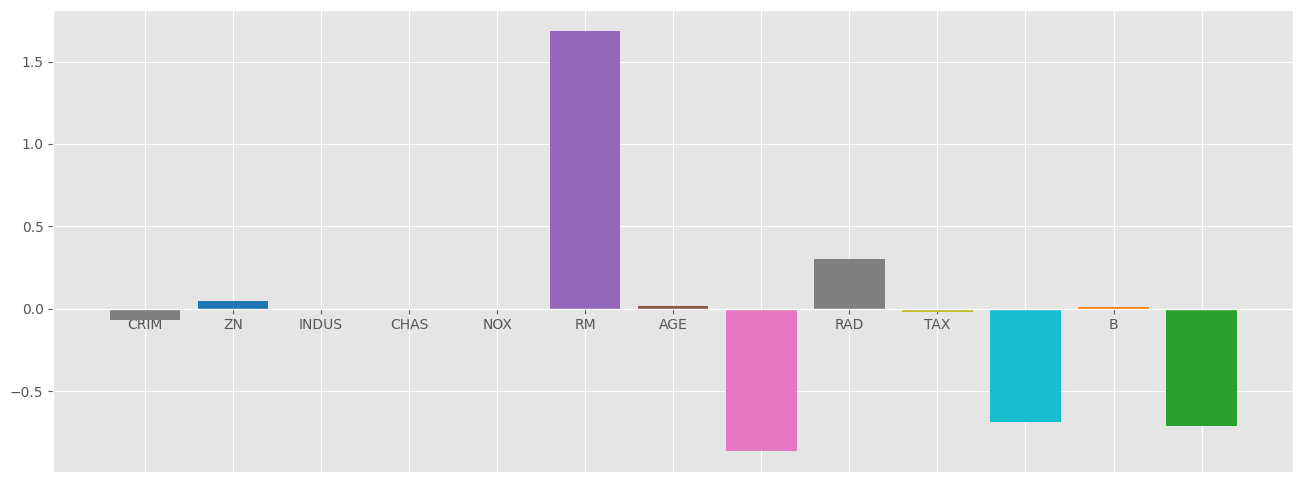

In [230]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(16, 6))
ax.bar(e_net_coeff["Columns"], e_net_coeff['Coefficient Estimate'], color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

# Referencias

1. https://github.com/SpencerPao/Ridge-Lasso-ElasticNet

2. https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/